# Dataset Overview: California Housing
This dataset contains information about various metrics related to California's housing market, with a primary focus on predicting and classifying house prices. Each entry represents a small geographical area, and the columns include features like location (latitude/longitude), house age, number of rooms, population, median income, and ocean proximity. The main goal is to use these features to predict the median house value.

# Step 1: Data Exploration, Cleaning, and Preparation

In [1]:
import numpy as np #Linear Algebra
import pandas as pd #Data Processing
import matplotlib.pyplot as plt #Create Plots

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.shape

(20640, 10)

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

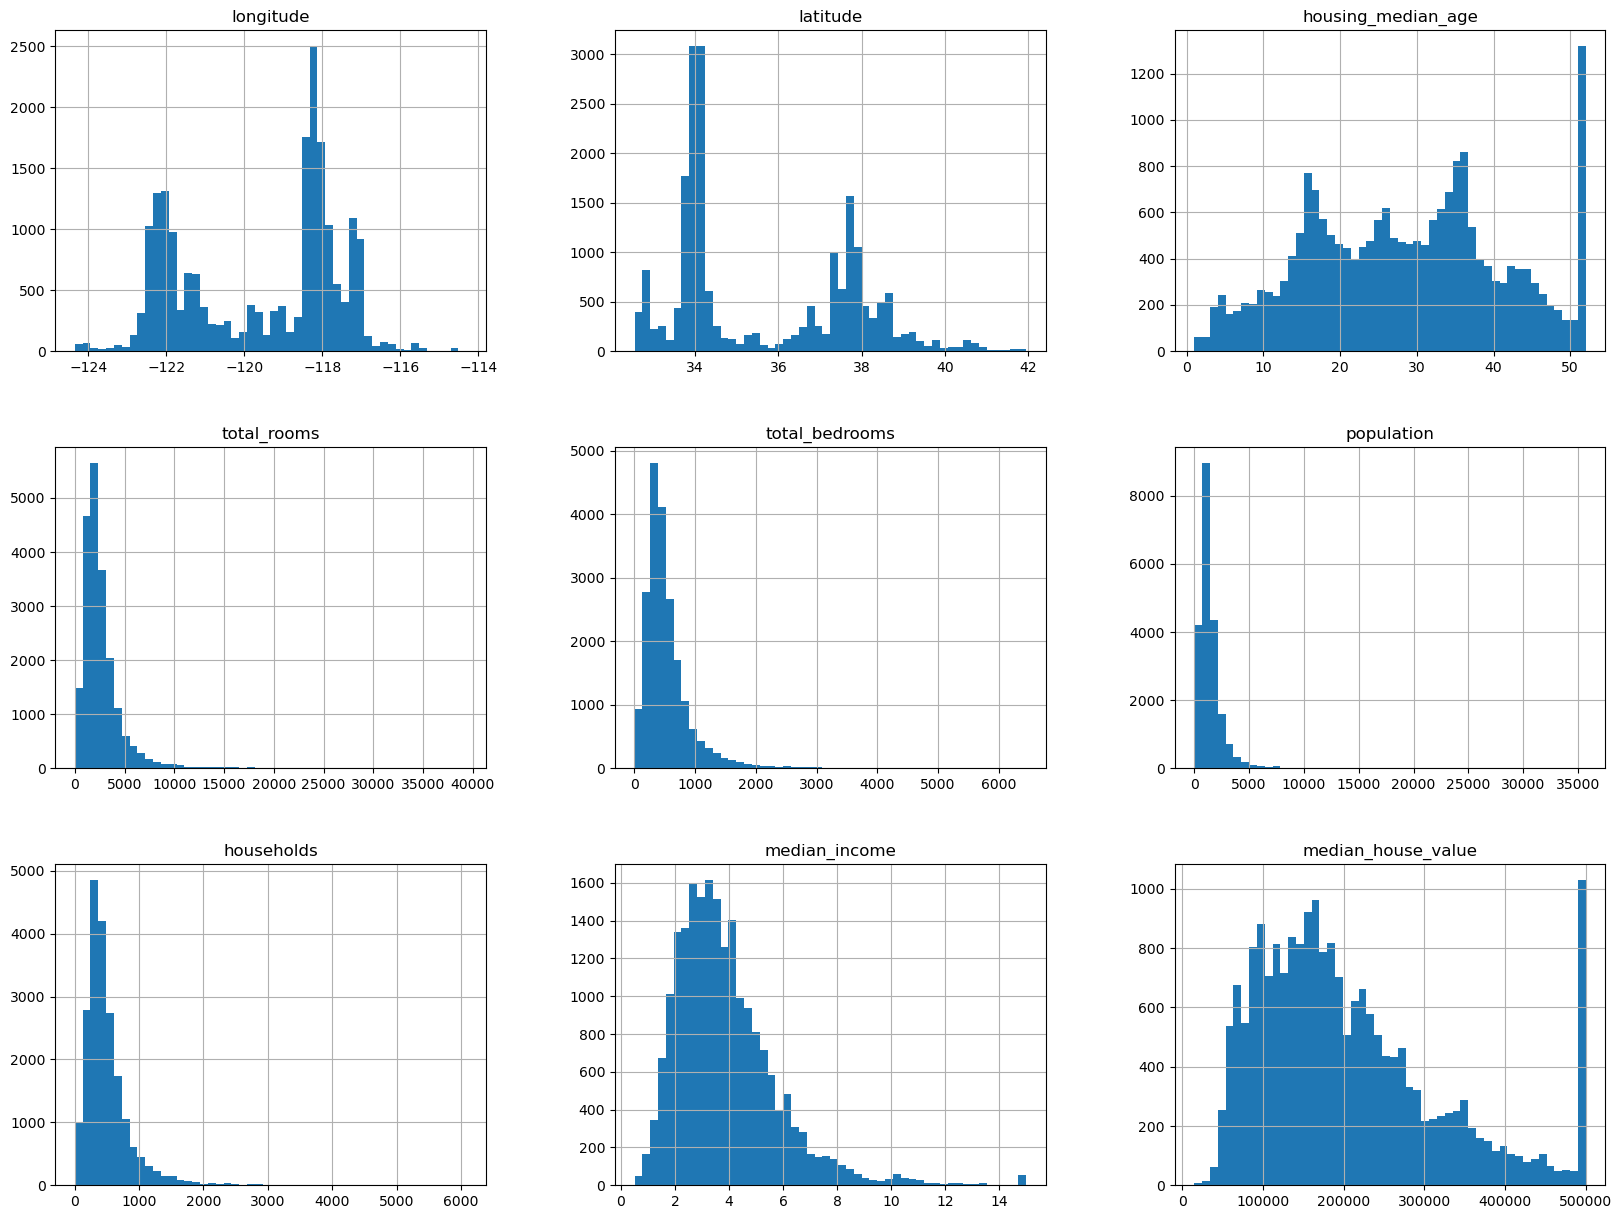

In [8]:
housing.hist(bins=50,figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

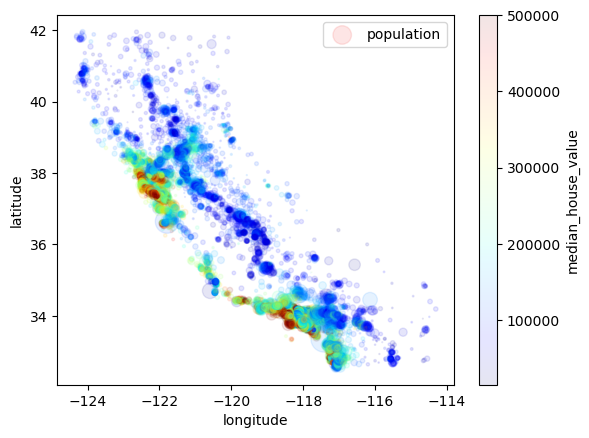

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=housing["population"]/100, label="population", c="median_house_value",cmap=plt.get_cmap("jet"))

In [10]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [11]:
# Handle missing values by dropping rows where 'total_bedrooms' is NaN.
# This ensures a clean dataset for our models.
housing_na=housing.dropna(subset=["total_bedrooms"])
housing_na.shape

(20433, 10)

In [12]:
# Convert categorical data ('ocean_proximity') into numerical format using one-hot encoding.
# This is necessary as machine learning models require numerical input.
dummies=pd.get_dummies(housing_na.ocean_proximity)
housing_na_dummies=pd.concat([housing_na, dummies], axis="columns")
housing_na_dummies.head()
# Drop the original 'ocean_proximity' column and the 'ISLAND' dummy,
# as it's not a common category and can be dropped for simplicity.
housing_clean=housing_na_dummies.drop(['ocean_proximity','ISLAND'], axis ='columns')
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [13]:
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [14]:
#creating Features and Label Datasets
X=housing_clean.drop(columns=['median_house_value'])
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [15]:
y=housing_clean['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

# Step 2: Linear Regression Model (Ordinary Least Squares - OLS)

In [16]:
#Split the data into training and testing sets.
# We use a 80/20 split, which is a common practice.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1984)

In [17]:
# Create and train the Linear Regression model.
# This model will predict the median house value based on the features.
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train,y_train)

LinearRegression()

In [18]:
#Display the intercept and coefficient of the OLS Model
print ("Intercept is " + str(OLS.intercept_))
print ("The set of Coefficients are " + str(OLS.coef_))
print ("The R-Squared Value is " + str(OLS.score(X_train, y_train)))

Intercept is -2146719.4958723723
The set of Coefficients are [-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.49036788e+05 -1.87787533e+05 -1.51883617e+05 -1.45673607e+05]
The R-Squared Value is 0.6433902949192565


In [19]:
#Predicting with OLS 
y_pred =OLS.predict(X_test)
performance = pd.DataFrame({'Predictions':y_pred,'Actual Values':y_test})
performance['error'] = performance['Actual Values']-performance['Predictions']
performance.head()

,Predictions,Actual Values,error
15175,315646.738470,328200.0,12553.261530
15424,235926.156196,156900.0,-79026.156196
16212,157003.325611,87200.0,-69803.325611
15356,172404.340246,141000.0,-31404.340246
1899,82931.270634,100800.0,17868.729366


In [20]:
#preparing data fro protting
performance.reset_index(drop=True,inplace=True)
performance.reset_index(inplace=True)
performance.head()

,index,Predictions,Actual Values,error
0,0,315646.738470,328200.0,12553.261530
1,1,235926.156196,156900.0,-79026.156196
2,2,157003.325611,87200.0,-69803.325611
3,3,172404.340246,141000.0,-31404.340246
4,4,82931.270634,100800.0,17868.729366


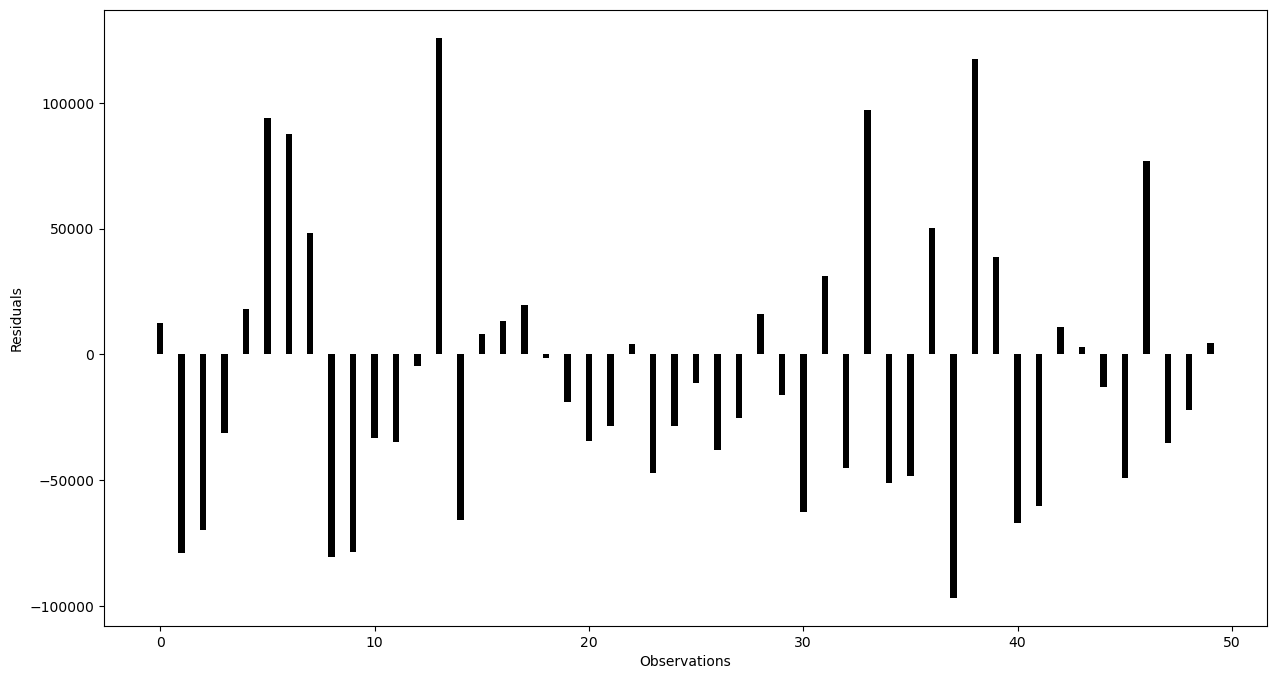

In [21]:
#plot the residuals
fig=plt.figure(figsize=(15,8))
plt.bar('index','error', data=performance[:50], color='black', width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()

In [22]:
# Use statsmodels to get a more detailed summary of the OLS model.
import statsmodels.api as sm
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_train_numeric = sm.add_constant(X_train_numeric)
nicerOLS = sm.OLS(y_train, X_train_numeric).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3539.
Date:                Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:54:13   Log-Likelihood:            -2.0543e+05
No. Observations:               16346   AIC:                         4.109e+05
Df Residuals:                   16337   BIC:                         4.110e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.597e+06   7.05e+04    -51.010      0.000   -3.74e+06   -3.46e+06
longitude          -4.293e+04    803.710    -53.414      0.000   -4.45e+04   -4.14e+04
latitude           -4.287e+04    757.915    -56.562      0.000   -4.44e+04   -4.14e+04
housing_median_age  1130.7097     48.530     23.299      0.000    1035.585    1225.834
total_rooms           -8.5568      0.892     -9.588      0.000     -10.306      -6.807
total_bedrooms       113.3434      7.677     14.764      0.000      98.295     128.391
population           -37.6987      1.198    -31.474      0.000     -40.046     -35.351
households            48.1856      8.325      5.788      0.000      31.869      64.503
median_income       4.046e+04    380.881    106.221      0.000    3.97e+04    4.12e+04
==============================================================================
Omnibus:                     3976.481   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15495.953
Skew:                           1.168   Prob(JB):                         0.00
Kurtosis:                       7.159   Cond. No.                     5.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Step 3: Logistic Regression for House Classification

In [24]:
#create the features and label datasets
housing_clean['expensive?']=np.where(housing_clean['median_house_value']>250000,1,0)
housing_clean.head()
X2=housing_clean.drop(columns=['median_house_value','expensive?'])
X2.head()
y2=housing_clean['expensive?']
y2.head()

0    1
1    1
2    1
3    1
4    1
Name: expensive?, dtype: int64

In [25]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2, test_size=0.2, random_state=1984)

In [29]:
# Create and train the Logistic Regression model.
# This model will classify houses as 'expensive' or not.
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()   #  parentheses create an instance
logistic.fit(X2_train, y2_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Evaluate the model's accuracy on the test set.
Logistic_Accuracy=logistic.score(X2_test, y2_test)
Logistic_Accuracy="{:.0%}".format(Logistic_Accuracy)
print("Accuracy of the logistic regression is: " + str(Logistic_Accuracy))

Accuracy of the logistic regression is: 84%


In [37]:
# Use statsmodels to get a more detailed summary of the Logistic Regression model.
# We convert y2_train to integer type for compatibility with statsmodels.
y2_train_clean = y2_train.astype(int)
X2_train_clean = X2_train.select_dtypes(include=[np.number])
X2_train_clean = sm.add_constant(X2_train_clean)
NicerLogistic = sm.Logit(y2_train_clean, X2_train_clean).fit()


Optimization terminated successfully.
         Current function value: 0.314951
         Iterations 8


In [38]:
NicerLogistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             expensive?   No. Observations:                16346
Model:                          Logit   Df Residuals:                    16337
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 Aug 2025   Pseudo R-squ.:                  0.4667
Time:                        00:03:06   Log-Likelihood:                -5148.2
converged:                       True   LL-Null:                       -9652.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -160.6538      4.775    -33.647      0.000    -170.012    -151.295
longitude             -1.8342      0.057    -32.337      0.000      -1.945      -1.723
latitude              -1.8558      0.059    -31.211      0.000      -1.972      -1.739
housing_median_age     0.0374      0.002     16.519      0.000       0.033       0.042
total_rooms            0.0001   4.76e-05      2.378      0.017    1.99e-05       0.000
total_bedrooms         0.0008      0.000      2.007      0.045    1.98e-05       0.002
population            -0.0021   9.12e-05    -22.606      0.000      -0.002      -0.002
households             0.0046      0.000      9.919      0.000       0.004       0.006
median_income          1.1101      0.026     42.618      0.000       1.059       1.161
======================================================================================
"""

# Final Project Report
This project focused on analyzing the California Housing dataset to build and evaluate machine learning models. The primary steps involved exploring the data, handling missing values, and preparing the features for modeling.

Two main models were developed:

A Linear Regression model was trained to predict the continuous median house value. The model's performance was evaluated using metrics like R-squared.

A Logistic Regression model was built to classify houses as "expensive" or "not expensive" based on whether their value was above a certain threshold. The model achieved an accuracy of 84%, demonstrating its ability to correctly classify the houses.

The project successfully applied both regression and classification techniques to a real-world dataset, providing key insights into the factors influencing housing prices in California.







